<a href="https://colab.research.google.com/github/KhumairahErnas/Tugas2_Deep_Learning_Khumairah/blob/main/Tugas2_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Necessary Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
# Import the train_test_split function
from sklearn.model_selection import train_test_split

In [3]:
# Load and Transform Data
dataset_path = '/content/drive/MyDrive/Dataset Helm '

filepaths = []
labels = []
classlist = os.listdir(dataset_path)
for klass in classlist:
    classpath = os.path.join(dataset_path, klass)
    if os.path.isdir(classpath):
        flist = os.listdir(classpath)
        for f in flist:
            fpath = os.path.join(classpath, f)
            filepaths.append(fpath)
            labels.append(klass)

Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis=1)

In [4]:
# Splitting the data
train_df, test_df = train_test_split(df, train_size=0.6, shuffle=True, random_state=8)
train_df, valid_df = train_test_split(train_df, train_size=0.8, shuffle=True, random_state=8)

# Check the lengths
print('Train length:', len(train_df), 'Validation length:', len(valid_df), 'Test length:', len(test_df))

Train length: 576 Validation length: 144 Test length: 480


In [7]:
# Data Augmentation
height, width, channels = 128, 128, 3
batch_size = 64

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_gen = train_datagen.flow_from_dataframe(
    train_df, x_col='filepaths', y_col='labels', target_size=(height, width),
    class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=batch_size
)

valid_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    valid_df, x_col='filepaths', y_col='labels', target_size=(height, width),
    class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=batch_size
)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    test_df, x_col='filepaths', y_col='labels', target_size=(height, width),
    class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=batch_size
)

Found 571 validated image filenames belonging to 4 classes.
Found 144 validated image filenames belonging to 4 classes.
Found 479 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 5 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(


In [8]:
# Data Preprocessing and Model Definition
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(height, width, channels))
base_model.trainable = False  # Freeze the base model

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(train_gen.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
train_gen = train_datagen.flow_from_dataframe(
    train_df, x_col='filepaths', y_col='labels', target_size=(height, width),
    class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=batch_size,
    errors='ignore'  # Ignore corrupted images
)

Found 571 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 5 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(


In [10]:
# Training the Model
train_gen = train_datagen.flow_from_dataframe(
    train_df, x_col='filepaths', y_col='labels', target_size=(height, width),
    class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=batch_size,
    errors='ignore'  # Ignore corrupted images
)

history = model.fit(
    train_gen,
    steps_per_epoch=len(train_df) // batch_size,
    validation_data=valid_gen,
    validation_steps=len(valid_df) // batch_size,
    epochs=50
)

Found 571 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 5 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 275s 30s/step - accuracy: 0.3261 - loss: 2.1944 - val_accuracy: 0.5469 - val_loss: 1.0307
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 135s 15s/step - accuracy: 0.5341 - loss: 1.1047 - val_accuracy: 0.7266 - val_loss: 0.7454
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 141s 15s/step - accuracy: 0.6508 - loss: 0.8771 - val_accuracy: 0.7500 - val_loss: 0.7194
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 141s 15s/step - accuracy: 0.6489 - loss: 0.8057 - val_accuracy: 0.7266 - val_loss: 0.7109
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 140s 16s/step - accuracy: 0.7177 - loss: 0.6975 - val_accuracy: 0.7188 - val_loss: 0.6387
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 143s 16s/step - accuracy: 0.7233 - loss: 0.6473 - val_accuracy: 0.7578 - val_loss: 0.5944
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 142s 16s/step - accuracy: 0.7662 - loss: 0.6055 - val_accuracy: 0.7266 - val_loss: 0.6443
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 141s 16s/step - accuracy: 0.7435 - loss: 0.6644 - val_accuracy: 0.8125 - val_loss:

In [11]:
# Model Evaluation
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_gen, steps=len(test_df) // batch_size)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 146s 22s/step - accuracy: 0.8350 - loss: 0.5036
Test Loss: 0.4907, Test Accuracy: 0.8504


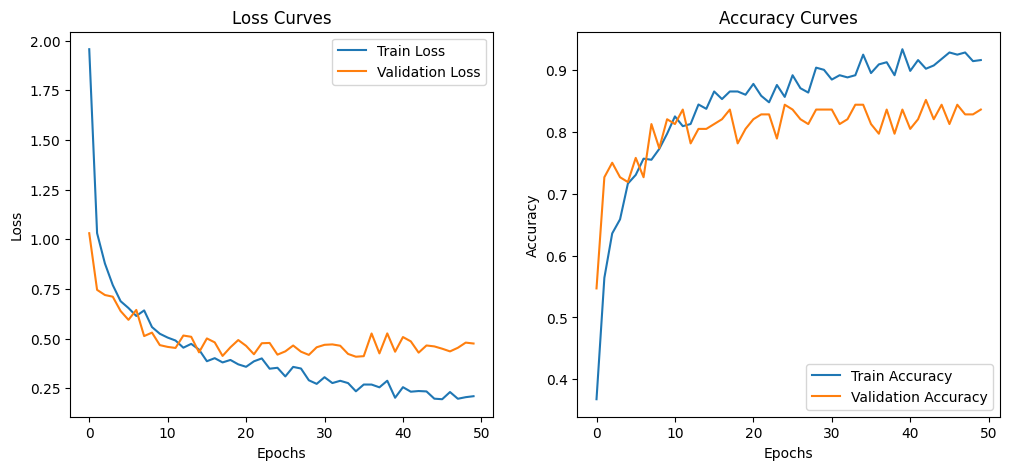

In [12]:
# Visualizing Loss Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [13]:
# Making Predictions on the Test Data
predictions = model.predict(test_gen, steps=len(test_df) // batch_size)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_gen.classes

7/7 ━━━━━━━━━━━━━━━━━━━━ 85s 12s/step


In [14]:
# Making Predictions on the Test Data
predictions = model.predict(test_gen)  # Remove steps argument
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_gen.classes

# Model Evaluation
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_gen)  # Remove steps argument
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 90s 11s/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 90s 11s/step - accuracy: 0.8361 - loss: 0.5033
Test Loss: 0.4957, Test Accuracy: 0.8476


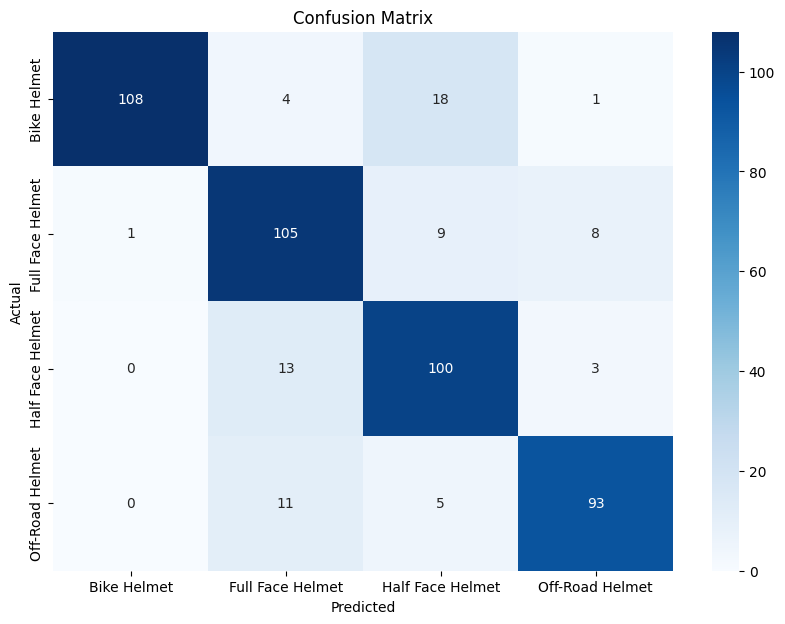

In [15]:
# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen.class_indices.keys()), yticklabels=list(test_gen.class_indices.keys()))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=list(test_gen.class_indices.keys()))
print(report)

                  precision    recall  f1-score   support

     Bike Helmet       0.99      0.82      0.90       131
Full Face Helmet       0.79      0.85      0.82       123
Half Face Helmet       0.76      0.86      0.81       116
 Off-Road Helmet       0.89      0.85      0.87       109

        accuracy                           0.85       479
       macro avg       0.86      0.85      0.85       479
    weighted avg       0.86      0.85      0.85       479



In [17]:
# Grad-CAM Visualization
import cv2

def get_gradcam(model, img, layer_name):
    """
    Generates a Grad-CAM heatmap for a given image and model.

    Args:
        model: The trained model.
        img: The input image.
        layer_name: The name of the convolutional layer to visualize.

    Returns:
        Heatmap overlayed on the image.
    """
    # Preprocess the image
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = img / 255.0  # Rescale
    preds = model.predict(img)  # Make prediction to define model output
    class_idx = np.argmax(preds[0])

    # Get the gradient of the top predicted class
    # Get the layer to visualize from the VGG16 model (base model)
    vgg16_model = model.get_layer('vgg16')
    grad_model = tf.keras.models.Model(
        inputs=model.inputs,  # Use the inputs of the main model
        # Instead of model.output, use vgg16_model.output
        # Correctly access the layer output and the model's final output
        outputs=[vgg16_model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img)  # Pass the image to the grad_model
        loss = predictions[:, class_idx]

    # Compute gradients
    grads = tape.gradient(loss, conv_outputs)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))

    # Get the output of the last convolutional layer
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)

    return heatmap.numpy()